In this notebbok, I will be trying to create my own linear regression class

# Understanding the math behind Linear Regression

In [13]:
class LinearRegressionGD:
    def __init__(self, learning_rate = 0.01, n_iters=1000):
        self.learning_rate = learning_rate
        self.n_iters = n_iters
        self.w = 0 # slope
        self.b = 0 # intercept
        self.losses = []

    def fit(self, X, y):
        # Gradient Descent
        n_samples = len(X)

        for _ in range(self.n_iters):
            # predict current y
            y_predicted = (self.w * X) + self.b

            # calculate the gradients
            dw = (-2/n_samples) * sum(X * (y - y_predicted))
            db = (-2/n_samples) * sum(y - y_predicted)

            # calculate MSE (loss)
            MSE = (1/n_samples) * sum((y - y_predicted)**2)

            # update the parameters and append loss
            self.w = self.w - (self.learning_rate * dw)
            self.b = self.b - (self.learning_rate * db)
            self.losses.append(MSE)

    def predict(self, X):
        return (self.w * X) + self.b

Slope: 1.9999999999999973
Intercept: 8.424360046094841e-15
Predictions: [ 2.  4.  6.  8. 10.]


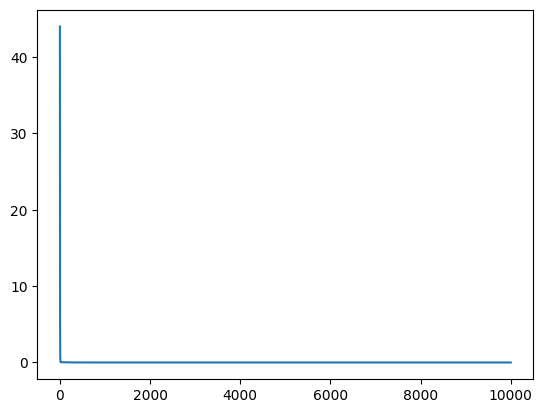

In [19]:
import numpy as np
import matplotlib.pyplot as plt
# Generate fake linear data
X = np.array([1, 2, 3, 4, 5])
y = np.array([2, 4, 6, 8, 10])

# create and train our model
regressor = LinearRegressionGD(n_iters=10000)
regressor.fit(X, y)

# test predictions
predictions = regressor.predict(X)

print(f'Slope: {regressor.w}')
print(f'Intercept: {regressor.b}')
print(f'Predictions: {predictions}')
plt.plot(regressor.losses)

In [20]:
class MultipleLinearRegressionGD:
    def __init__(self, learning_rate = 0.01, n_iters = 1000):
        self.learning_rate = learning_rate
        self.n_iters= n_iters
        self.w = None # will be NumPy array later (vector of weights)
        self.b = 0

    def fit(self, X, y):
        n_features = X.shape[1]
        self.w = np.zeros(n_features)

        n_samples = X.shape[0]

        for _ in range(self.n_iters):
            # predict current y
            y_predicted = (X @ self.w) + self.b
            errors = y - y_predicted

            dw = (-2/n_samples) * (X.T @ errors)
            db = (-2/n_samples) * sum(errors)

            self.w = self.w - (self.learning_rate * dw)
            self.b = self.b - (self.learning_rate * db)

    def predict(self, X):
        return((X @ self.w) + self.b)


In [22]:
import numpy as np

# Create test data
X = np.array([
    [1, 2],
    [2, 3],
    [4, 5],
    [3, 6]
])

y = np.array([
    12,
    17,
    27,
    26
])

# Initialize and train model
model = MultipleLinearRegressionGD(learning_rate=0.01, n_iters=10000)
model.fit(X, y)

# Show results
print("Learned weights:", model.w)
print("Learned bias:", model.b)

# Make predictions
predictions = model.predict(X)
print("Predictions:", predictions)
print("Actual:", y)

# Optional: Mean Squared Error
mse = np.mean((y - predictions)**2)
print("MSE:", mse)


Learned weights: [3. 2.]
Learned bias: 4.9999999999734985
Predictions: [12. 17. 27. 26.]
Actual: [12 17 27 26]
MSE: 9.549454082868366e-23
